# 선형 회귀

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## k-최근접 이웃의 한계

In [1]:
## 전체소스코드
## https://bit.ly/hg-03-2

In [2]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [4]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [5]:
print(knr.predict([[50]]))

[1033.33333333]


In [6]:
import matplotlib.pyplot as plt

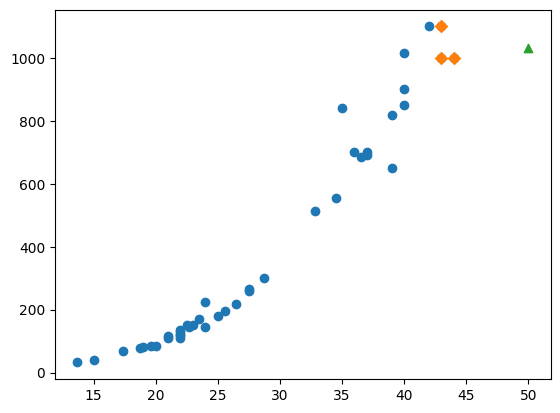

In [7]:
# 50cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.show()

In [8]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [9]:
print(knr.predict([[100]]))

[1033.33333333]


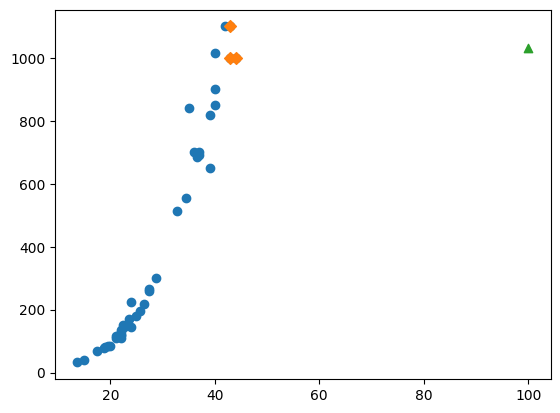

In [10]:
# 100cm 농어의 이웃을 구합니다
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.show()

# 선형 회귀

### 농어의 길이 와 무게 간의 인과성 분석

In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

### 관계 확인을 위한 산점도

In [2]:
from matplotlib import rc, font_manager
import matplotlib.pyplot as plt
import inspect
print(inspect.getfile(font_manager))
print(inspect.getfile(plt))

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = path).get_name()
print(font_name)
rc('font', family = font_name)

# rc('font', family = "Malgun Gothic")


import matplotlib as mpl
print(inspect.getfile(mpl))
mpl.rcParams['axes.unicode_minus'] = False

C:\Users\nbumk\AppData\Roaming\Python\Python39\site-packages\matplotlib\font_manager.py
C:\Users\nbumk\AppData\Roaming\Python\Python39\site-packages\matplotlib\pyplot.py
Malgun Gothic
C:\Users\nbumk\AppData\Roaming\Python\Python39\site-packages\matplotlib\__init__.py


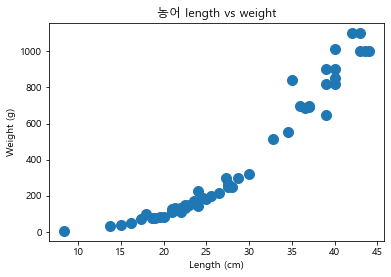

In [20]:
plt.rcParams['figure.figsize'] = (4, 3)

plt.scatter(perch_length, perch_weight, s = 100)
plt.title('농어 length vs weight')
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')

plt.show()

### 임의의 회귀직선 그리기

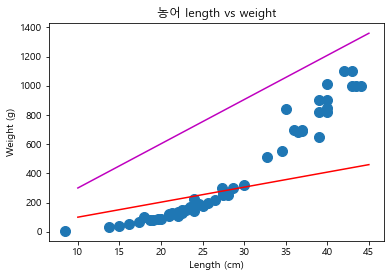

In [21]:
points = [10, 45]

plt.scatter(perch_length, perch_weight, s = 100)

## 임의의 직선
plt.plot(points, [10*points[0] + 0, 10*points[1] + 10], 'r')
plt.plot(points, [30*points[0] + 0, 30*points[1] + 10], 'm')
##

plt.title('농어 length vs weight')
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')

plt.show()

### Training set과 Test set 나누기

In [24]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다 (train / target)

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, test_size=0.3)

### Training set과 Test set 크기 확인

perch_length size = 
 (56,)
train_input size = 
 (39,)


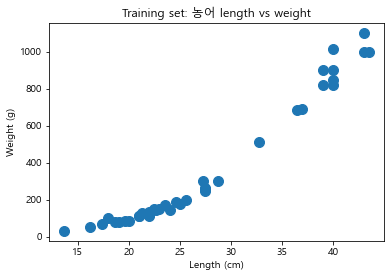

In [25]:
print('perch_length size = \n', np.shape(perch_length))
print('train_input size = \n', train_input.shape)

plt.scatter(train_input, train_target, s = 100)

plt.title('Training set: 농어 length vs weight')
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')

plt.show()

In [26]:
train_input[:10]

array([27.3, 36.5, 22.5, 17.4, 32.8, 19. , 18. , 27.5, 20. , 23. ])

### 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다

In [27]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print('train input shape = \n', train_input.shape)
print()
print(train_input[:10])

train input shape = 
 (39, 1)

[[27.3]
 [36.5]
 [22.5]
 [17.4]
 [32.8]
 [19. ]
 [18. ]
 [27.5]
 [20. ]
 [23. ]]


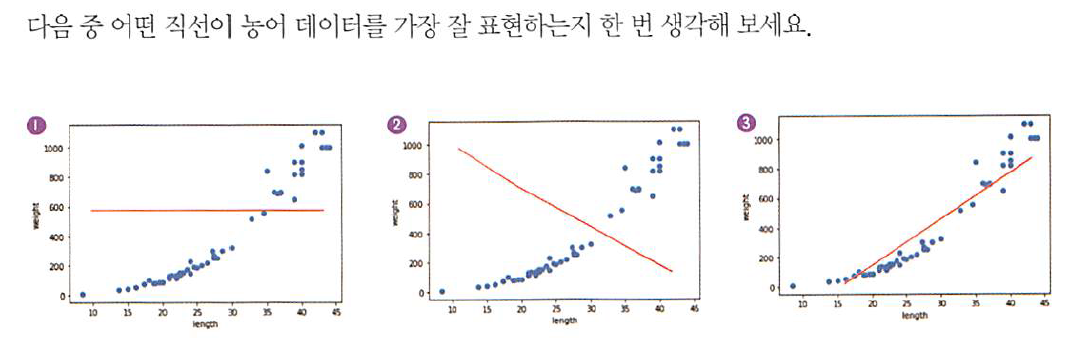

In [37]:
# from IPython.display import Image
# Image('../fig/hg_regression.png')

### Linear regression 분석을 위한 ML module import

In [28]:
from sklearn.linear_model import LinearRegression
# inspect.getfile(LinearRegression)

### 선형 회귀 모델 훈련

In [29]:
lr = LinearRegression()
lr.fit(train_input, train_target, sample_weight=None)

LinearRegression()

### 모델 파라메터 확인

In [30]:
print(lr.coef_, lr.intercept_)

[38.72805244] -701.0520300890794


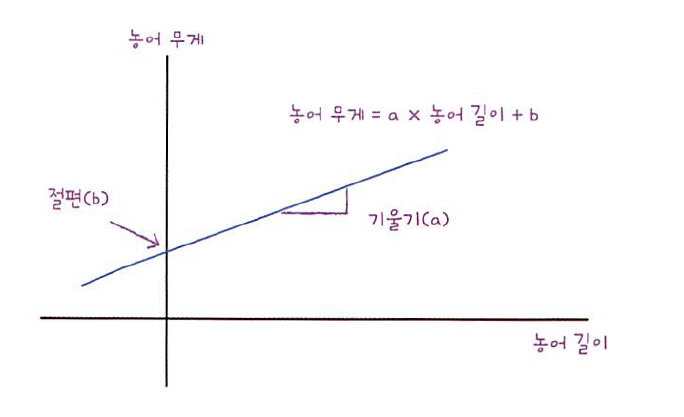

In [31]:
# from IPython.display import Image
# Image('../fig/hg_regression_slope.png')

### 회귀 모델 그리기

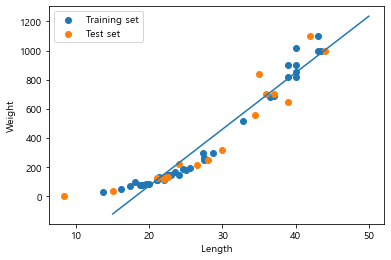

In [37]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target, label = 'Training set')
plt.scatter(test_input, test_target, label = 'Test set')

plt.legend()
plt.xlabel('Length')
plt.ylabel('Weight')

# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
# plt.scatter(50, 1241.8, marker='^')
plt.show()

### 회귀 모델 Performance (R squared)

In [38]:
print('train performance =', lr.score(train_input, train_target).round(4))
print('test performance =', lr.score(test_input, test_target).round(4))

train performance = 0.9499
test performance = 0.838


In [62]:
# 50cm 농어에 대한 예측
lr.predict([[10], [30], [50]])

array([-313.77150573,  460.78954298, 1235.35059169])

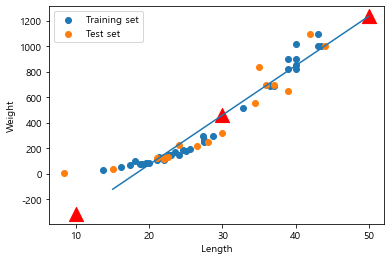

In [50]:
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target, label = 'Training set')
plt.scatter(test_input, test_target, label = 'Test set')

plt.legend()
plt.xlabel('Length')
plt.ylabel('Weight')

# 15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(30, 30*lr.coef_+lr.intercept_, marker='^', c = 'r', s = 200)
plt.scatter(50, 50*lr.coef_+lr.intercept_, marker='^', c = 'r', s = 200)
plt.scatter(10, 10*lr.coef_+lr.intercept_, marker='^', c = 'r', s = 200)

plt.show()

In [63]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9499438463502943
0.8379663764934585


## 다항 회귀

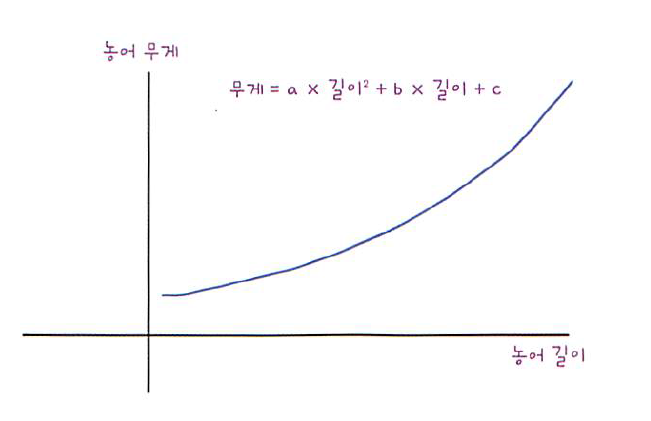

In [39]:
from IPython.display import Image
Image('../fig/hg_2nd_order_regression.png')

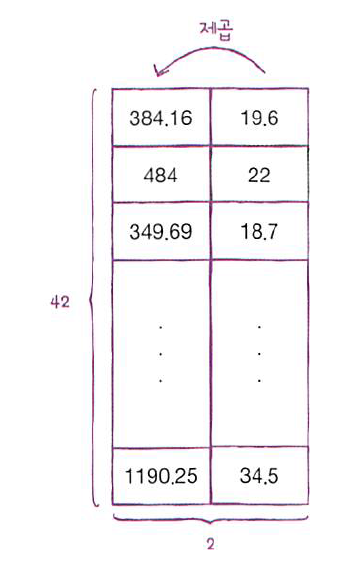

In [40]:
from IPython.display import Image
Image('../fig/hg_2nd_order_regression_table.png')

### 제곱 Column 만들기

In [66]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print('train_poly =', train_poly[:10])
print('test_poly =', test_poly[:10])

train_poly = [[ 745.29   27.3 ]
 [1332.25   36.5 ]
 [ 506.25   22.5 ]
 [ 302.76   17.4 ]
 [1075.84   32.8 ]
 [ 361.     19.  ]
 [ 324.     18.  ]
 [ 756.25   27.5 ]
 [ 400.     20.  ]
 [ 529.     23.  ]]
test_poly = [[1936.     44.  ]
 [1296.     36.  ]
 [ 702.25   26.5 ]
 [  70.56    8.4 ]
 [1764.     42.  ]
 [ 784.     28.  ]
 [ 576.     24.  ]
 [ 484.     22.  ]
 [1521.     39.  ]
 [ 441.     21.  ]]


In [67]:
print(train_poly.shape, test_poly.shape)

(39, 2) (17, 2)


### 다항회귀 추정

In [68]:
lrp = LinearRegression()
lrp.fit(train_poly, train_target)

LinearRegression()

### 다항회귀계수

In [71]:
print(lrp.coef_, lrp.intercept_)

[  1.11716349 -28.04800995] 206.7434760215349


### 다항회귀 직선

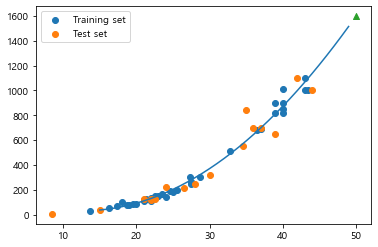

In [76]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target, label = 'Training set')
plt.scatter(test_input, test_target, label = 'Test set')


# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, lrp.coef_[0]*point**2 + lrp.coef_[1]*point + lrp.intercept_)

plt.legend()
# 50cm 농어 데이터
plt.scatter([50], lrp.predict([[50**2, 50]]), marker='^')
plt.show()

In [75]:
print(lrp.predict([[50**2, 50]]))


[1597.25171569]


In [77]:
print(lrp.score(train_poly, train_target))
print(lrp.score(test_poly, test_target))

0.9878857927066607
0.9348874201588023


## Multiple linear regression

$\hat{y} = (X^TX)^{-1}X^Ty$

In [3]:
import pandas as pd
import numpy as np
df = pd.DataFrame({
    "Sale_Price":[215000, 105000, 172000, 244000, 189900, 195500],
    "Gr_Liv_Area":[1656, 896, 1329, 2110, 1629, 1604],
    "Year_Built":[1960,1961, 1958, 1968, 1997, 1998]
})

print(df)

   Sale_Price  Gr_Liv_Area  Year_Built
0      215000         1656        1960
1      105000          896        1961
2      172000         1329        1958
3      244000         2110        1968
4      189900         1629        1997
5      195500         1604        1998


In [28]:
X = df[["Gr_Liv_Area", "Year_Built"]].to_numpy()
X = np.column_stack((np.ones(6), X))

# y = df["Sale_Price"].to_numpy()
X


array([[1.000e+00, 1.656e+03, 1.960e+03],
       [1.000e+00, 8.960e+02, 1.961e+03],
       [1.000e+00, 1.329e+03, 1.958e+03],
       [1.000e+00, 2.110e+03, 1.968e+03],
       [1.000e+00, 1.629e+03, 1.997e+03],
       [1.000e+00, 1.604e+03, 1.998e+03]])

In [38]:
## Parameter estimation

## Determinant

## Matrix inverse
XTX_inv = np.linalg.inv(X.T.dot(X))
print(XTX_inv)
print(X.T.dot(y))

[[ 2.34474255e+03  1.33194115e-02 -1.19830379e+00]
 [ 1.33194115e-02  1.33410038e-06 -7.78772259e-06]
 [-1.19830379e+00 -7.78772259e-06  6.13212018e-04]]
[1.1214000e+06 1.8164771e+09 2.2141123e+09]


In [39]:
y_hat  = XTX_inv.dot(X.T.dot(y))
print(y_hat)

[ 4.09527791e+05  1.16858471e+02 -2.03822773e+02]
